<br> Mouhammad BAZZI & Ameer Ali

Student ID : A20522180 & A20424662

CS579 - Spring 2023</br> <h1><br><b><font color='red'>Project 2</font></br></h1>

## 1. **LIBRARIES IMPORTATION**

In [14]:
# We import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Conv1D, MaxPooling1D, Dropout, Embedding, LSTM, Bidirectional, Activation, MultiHeadAttention, LayerNormalization, Add, GlobalAveragePooling1D, Reshape
from keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.utils import plot_model

## 2. **DATA IMPORTATION, VISUALIZATION AND PREPARATION**

In [2]:
############################################
# GLOBAL VARIABLES
# We store the path of the dataset
DATA_SET_DIR = '../option1-data(1)/train.csv'
############################################

#### **DATA IMPORTATION**

In [3]:
#Importation of the dataset : train.csv

# The dataset is a csv file with 6 columns, and we will use only the last 3 columns where the last 1 is the label
# The 2 features are text where the first one is the fake news title 1 in English and the second one the news title 2 in English.
# The label indicates the relation between the news pair:  agreed/disagreed/unrelated.


#Function to load the dataset 
def load_data():
    # We load the dataset
    dataset = pd.read_csv(DATA_SET_DIR)
    # We store the features in X
    features = dataset.iloc[:, 3:5].values
    # We store the labels in y
    labels = dataset.iloc[:, 5].values
    return np.array(features), np.array(labels)

features, labels = load_data()


#### **DATA VISUALIZATION**

In [ ]:
# We want to know the class distribution of the dataset

#Function to plot the class distribution of the dataset
def plot_class_distribution(labels):
    # We store the unique labels
    unique, counts = np.unique(labels, return_counts=True)
    # We plot the distribution
    plt.bar(unique, counts, 1)
    plt.title('Class Frequency')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.show()
    
plot_class_distribution(labels)

#### **PRE-PROCESSING THE DATASET**

In [4]:
#Preprocessing of the dataset

# We will use keras to preprocess the dataset
# We will tokenize the features using the function Tokenizer from keras
# We will use the function to_categorical from keras to convert the labels to categorical data

############################################
# GLOBAL VARIABLES
# We store the path of the dataset
VOCABULARY_SIZE = 1000
############################################

# We initialize the tokenizer

tokenizer_1 = Tokenizer(num_words=VOCABULARY_SIZE)
tokenizer_2 = Tokenizer(num_words=VOCABULARY_SIZE)
# Now we process each feature separately
# We tokenize the first feature
tokenizer_1.fit_on_texts(features[:, 0])
docs_1 = tokenizer_1.texts_to_matrix(features[:, 0], mode='tfidf')
# We tokenize the second feature
tokenizer_2.fit_on_texts(features[:, 1])
docs_2 = tokenizer_2.texts_to_matrix(features[:, 1], mode='tfidf')

# We convert the labels to categorical data
def one_hot_encoding(labels):
    # We initialize the output
    labels_encoded = np.zeros((len(labels), 3))
    # We encode the labels
    for i in range(len(labels)):
        if labels[i] == 'unrelated':
            labels_encoded[i, 0] = 1
        elif labels[i] == 'agreed':
            labels_encoded[i, 1] = 1
        elif labels[i] == 'disagreed':
            labels_encoded[i, 2] = 1
    return labels_encoded

labels_encoded = one_hot_encoding(labels)

# We split the dataset into training valdiation and test set
# We will use 60% of the dataset for training, 20% for validation and 20% for testing

# We split the dataset into training and test set
docs_1_train, docs_1_test, docs_2_train, docs_2_test, labels_train, labels_test = train_test_split(docs_1, docs_2, labels_encoded, test_size=0.2, random_state=0)
# We split the training set into training and validation set
docs_1_train, docs_1_val, docs_2_train, docs_2_val, labels_train, labels_val = train_test_split(docs_1_train, docs_2_train, labels_train, test_size=0.25, random_state=0)


# We convert featurs to tensors
features_train = np.array([docs_1_train, docs_2_train])
features_val = np.array([docs_1_val, docs_2_val])
features_train = np.transpose(features_train, (1, 2, 0))
features_val = np.transpose(features_val, (1, 2, 0))
features_test = np.array([docs_1_test, docs_2_test])
features_test = np.transpose(features_test, (1, 2, 0))

# We output the shapes of the datasets
print('Training set shape: ', features_train.shape, labels_train.shape)
print('Validation set shape: ', features_val.shape, labels_val.shape)
print('Test set shape: ', features_test.shape, labels_test.shape)

# We reshape the features
features_train = features_train.reshape((features_train.shape[0], features_train.shape[1]*features_train.shape[2]))
features_val = features_val.reshape((features_val.shape[0], features_val.shape[1]*features_val.shape[2]))
features_test = features_test.reshape((features_test.shape[0], features_test.shape[1]*features_test.shape[2]))
print('We reshape the features: \n')

# We output the shapes of the datasets
print('Training set shape: ', features_train.shape, labels_train.shape)
print('Validation set shape: ', features_val.shape, labels_val.shape)
print('Test set shape: ', features_test.shape, labels_test.shape)

Training set shape:  (153864, 1000, 2) (153864, 3)
Validation set shape:  (51289, 1000, 2) (51289, 3)
Test set shape:  (51289, 1000, 2) (51289, 3)
We reshape the features: 

Training set shape:  (153864, 2000) (153864, 3)
Validation set shape:  (51289, 2000) (51289, 3)
Test set shape:  (51289, 2000) (51289, 3)


## 3. **FIRST MODEL: Simple Convolutional Neural Network (CNN)**

#### **BUILDING THE MODEL**

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 1998, 64)          256       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 999, 64)          0         
 1D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 63936)             0         
                                                                 
 dense_49 (Dense)            (None, 64)                4091968   
                                                                 
 dense_50 (Dense)            (None, 3)                 195       
                                                                 
Total params: 4,092,419
Trainable params: 4,092,419
Non-trainable params: 0
____________________________________________

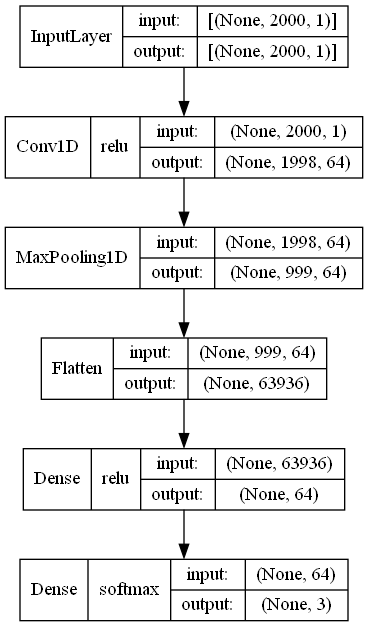

In [34]:
def build_simple_model():
    # We initialize the model
    model = Sequential()
    # We add the layers
    model.add(Conv1D(64, 3, activation='relu', input_shape=(2*VOCABULARY_SIZE, 1)))
    model.add(MaxPooling1D(2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # We compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# We build the model
model = build_simple_model()
# We print the model summary
model.summary()

# We plot the model
plot_model(model, to_file='cnn_model_plot.png', show_layer_names=False, show_shapes=True, show_layer_activations=True)

#### **MODEL TRAINING**

Epoch 1/10
1203/1203 [==============================] - 15s 10ms/step - loss: 0.5407 - accuracy: 0.7515 - val_loss: 0.4786 - val_accuracy: 0.7835
Epoch 2/10
1203/1203 [==============================] - 10s 9ms/step - loss: 0.4263 - accuracy: 0.8142 - val_loss: 0.4515 - val_accuracy: 0.8003
Epoch 3/10
1203/1203 [==============================] - 11s 9ms/step - loss: 0.3589 - accuracy: 0.8478 - val_loss: 0.4460 - val_accuracy: 0.8071
Epoch 4/10
1203/1203 [==============================] - 11s 9ms/step - loss: 0.3058 - accuracy: 0.8728 - val_loss: 0.4734 - val_accuracy: 0.8049
Epoch 5/10
1203/1203 [==============================] - 11s 9ms/step - loss: 0.2640 - accuracy: 0.8915 - val_loss: 0.4844 - val_accuracy: 0.8048
Epoch 6/10
1203/1203 [==============================] - 12s 10ms/step - loss: 0.2275 - accuracy: 0.9073 - val_loss: 0.5370 - val_accuracy: 0.8057
Epoch 7/10
1203/1203 [==============================] - 12s 10ms/step - loss: 0.1978 - accuracy: 0.9205 - val_loss: 0.5973 - val

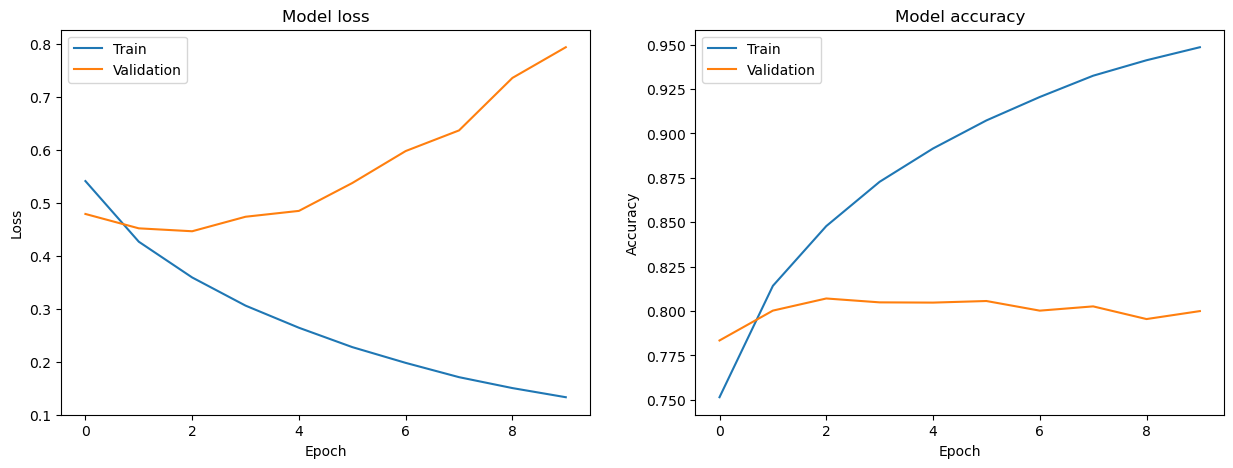

In [6]:
# We train the model

# We define the hyper-parameters
BATCH_SIZE = 128
EPOCHS = 10

# We train the model
history = model.fit(features_train, labels_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(features_val, labels_val))

def plot_history(history):
    plt.figure(figsize=(15, 5))
    # We plot the training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    # We plot the training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    # We show the plots
    plt.show()

# We plot the history
plot_history(history)



#### **MODEL EVALUATION AND SAVING**

In [7]:
# Model evaluation

# We define the hyper-parameters
BATCH_SIZE_EVAL = 128
EPOCHS_EVAL = 2

# We train again the model with the whole training set
train_val_features = np.concatenate((features_train, features_val), axis=0)
train_val_labels = np.concatenate((labels_train, labels_val), axis=0)

model = build_simple_model()
model.fit(train_val_features, train_val_labels, batch_size=BATCH_SIZE_EVAL, epochs=EPOCHS_EVAL)

# We evaluate the model on the test set
loss, accuracy = model.evaluate(features_test, labels_test)
print('Test loss: ', loss)
print('Test accuracy: ', accuracy)

# We save the model
model.save('simple_model.h5')

Epoch 1/2
1603/1603 [==============================] - 14s 9ms/step - loss: 0.5184 - accuracy: 0.7636
Epoch 2/2
1603/1603 [==============================] - 6s 4ms/step - loss: 0.4372 - accuracy: 0.8078
Test loss:  0.4372076392173767
Test accuracy:  0.8077950477600098


## 4. **SECOND MODEL: RNN (Bidirectional LSTM)**

#### **BUILDING THE MODEL**

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 2000)]            0         
                                                                 
 embedding_1 (Embedding)     (None, 2000, 32)          64000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              49664     
 nal)                                                            
                                                                 
 dense_47 (Dense)            (None, 32)                4128      
                                                                 
 dense_48 (Dense)            (None, 3)                 99        
                                                                 
Total params: 117,891
Trainable params: 117,891
Non-trainable params: 0
_____________________________________________________

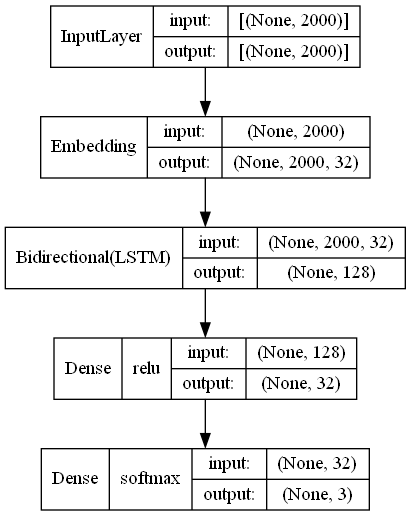

In [33]:
# We want to build a RNN model to classify the news pairs

# We define the model
def rnn_model():
    # We define the input layer
    inputs = Input(shape=(2*VOCABULARY_SIZE,))

    # Define the embedding layer
    embedding = Embedding(2*VOCABULARY_SIZE, 32)(inputs)
    # Define the bidirectional LSTM layer
    lstm = Bidirectional(LSTM(64))(embedding)
    dense_1 = Dense(32, activation="relu")(lstm)
    output = Dense(3, activation="softmax")(dense_1)
    model = Model(inputs=inputs, outputs=output)

    # We compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# We build the model
model = rnn_model()
# We print the model summary
model.summary()

# We plot the model
plot_model(model, to_file='rnn_model_plot.png', show_layer_names=False, show_shapes=True, show_layer_activations=True)

#### **MODEL TRAINING**

Epoch 1/10
1203/1203 [==============================] - 312s 257ms/step - loss: 0.7148 - accuracy: 0.6837 - val_loss: 0.7104 - val_accuracy: 0.6867
Epoch 2/10
1203/1203 [==============================] - 384s 319ms/step - loss: 0.7118 - accuracy: 0.6844 - val_loss: 0.7069 - val_accuracy: 0.6867
Epoch 3/10
1203/1203 [==============================] - 298s 248ms/step - loss: 0.7080 - accuracy: 0.6844 - val_loss: 0.7079 - val_accuracy: 0.6867
Epoch 4/10
1203/1203 [==============================] - 305s 254ms/step - loss: 0.7011 - accuracy: 0.6855 - val_loss: 0.6913 - val_accuracy: 0.6888
Epoch 5/10
1203/1203 [==============================] - 304s 253ms/step - loss: 0.6910 - accuracy: 0.6880 - val_loss: 0.6938 - val_accuracy: 0.6890
Epoch 6/10
1203/1203 [==============================] - 302s 251ms/step - loss: 0.6870 - accuracy: 0.6890 - val_loss: 0.6828 - val_accuracy: 0.6942
Epoch 7/10
1203/1203 [==============================] - 304s 252ms/step - loss: 0.6835 - accuracy: 0.6927 - val_

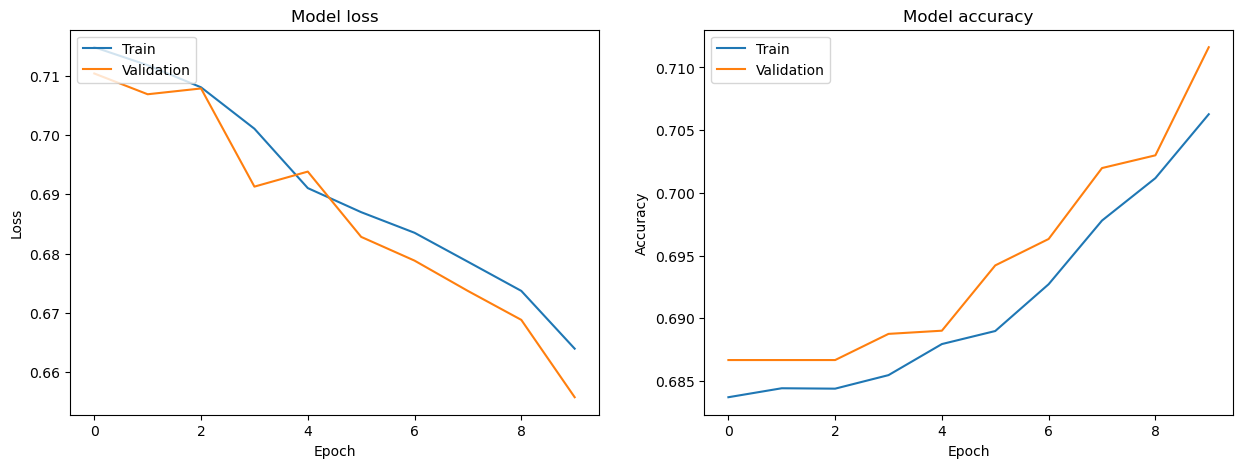

In [9]:
# We set the hyper-parameters
BATCH_SIZE = 128
EPOCHS = 10

# Training of the model
history = model.fit(features_train, labels_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(features_val, labels_val))

#We plot the training and validation accuracy and loss
plot_history(history)

In [11]:
# We evaluate the model on the test set
loss, accuracy = model.evaluate(features_test, labels_test)

print('Test loss: ', loss)
print('Test accuracy: ', accuracy)

1603/1603 [==============================] - 149s 93ms/step - loss: 0.6621 - accuracy: 0.7110
Test loss:  0.6621426939964294
Test accuracy:  0.7109516859054565


#### **MODEL EVALUATION AND SAVING**

In [ ]:
# We train again the model with the whole training set

# We set the hyper-parameters
BATCH_SIZE_EVAL = 128
EPOCHS_EVAL = 10

train_val_features = np.concatenate((features_train, features_val), axis=0)
train_val_labels = np.concatenate((labels_train, labels_val), axis=0)

model = rnn_model()
model.fit(train_val_features, train_val_labels, batch_size=BATCH_SIZE_EVAL, epochs=EPOCHS_EVAL)

# We evaluate the model on the test set
loss, accuracy = model.evaluate(features_test, labels_test)

print('Test loss: ', loss)
print('Test accuracy: ', accuracy)

# We save the model
model.save('rnn_model.h5')

## 5. **THIRD MODEL: Complex Multilayer Perceptron (MLP)**

#### **BUILDING THE MODEL**

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 2000)              0         
                                                                 
 dense_42 (Dense)            (None, 256)               512256    
                                                                 
 dropout_28 (Dropout)        (None, 256)               0         
                                                                 
 activation_16 (Activation)  (None, 256)               0         
                                                                 
 dense_43 (Dense)            (None, 128)               32896     
                                                                 
 dropout_29 (Dropout)        (None, 128)               0         
                                                                 
 activation_17 (Activation)  (None, 128)              

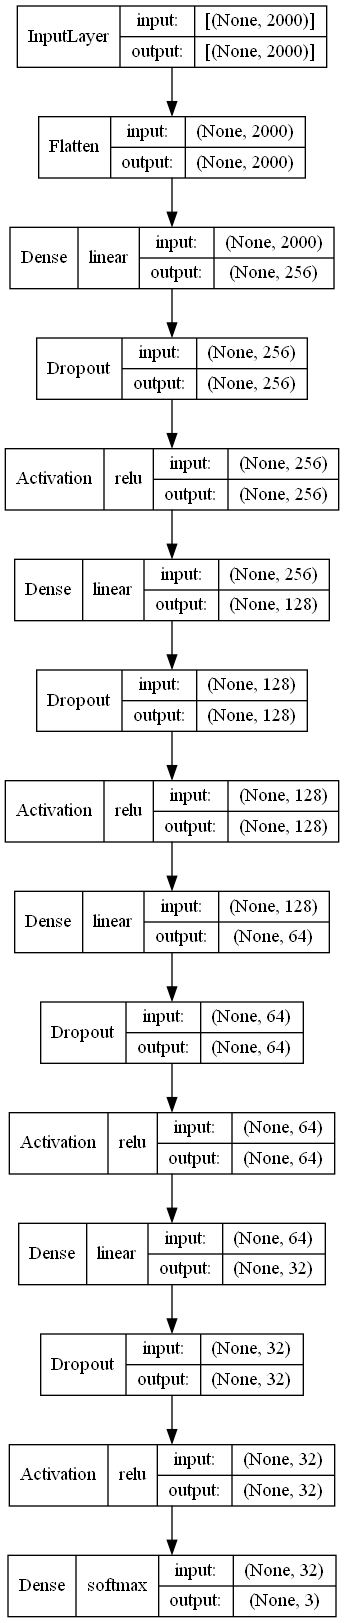

In [32]:
# We will build a simple ANN model to classify the news pairs

# We import the libraries


def build_complex_model():
    # We initialize the model
    model = Sequential()
    # We flatten the input
    model.add(Flatten(input_shape=(2*VOCABULARY_SIZE,)))
    # We add the layers
    model.add(Dense(256))
    model.add(Dropout(0.5))
    model.add(Activation('relu'))

    model.add(Dense(128))
    model.add(Dropout(0.5))
    model.add(Activation('relu'))

    model.add(Dense(64))
    model.add(Dropout(0.5))
    model.add(Activation('relu'))

    model.add(Dense(32))
    model.add(Dropout(0.5))
    model.add(Activation('relu'))

    model.add(Dense(3, activation='softmax'))

    # We compile the model
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

# We build the model
model = build_complex_model()
model.summary()

# We plot the model
plot_model(model, to_file='mlp_model_plot.png', show_layer_names=False, show_shapes=True, show_layer_activations=True)

#### **MODEL TRAINING**

Epoch 1/25
1203/1203 [==============================] - 10s 8ms/step - loss: 0.6867 - accuracy: 0.6810 - val_loss: 0.5836 - val_accuracy: 0.7011
Epoch 2/25
1203/1203 [==============================] - 7s 6ms/step - loss: 0.5686 - accuracy: 0.7214 - val_loss: 0.5057 - val_accuracy: 0.7595
Epoch 3/25
1203/1203 [==============================] - 7s 6ms/step - loss: 0.5009 - accuracy: 0.7711 - val_loss: 0.4659 - val_accuracy: 0.7938
Epoch 4/25
1203/1203 [==============================] - 7s 6ms/step - loss: 0.4460 - accuracy: 0.8079 - val_loss: 0.4347 - val_accuracy: 0.8104
Epoch 5/25
1203/1203 [==============================] - 7s 5ms/step - loss: 0.4014 - accuracy: 0.8351 - val_loss: 0.4126 - val_accuracy: 0.8211
Epoch 6/25
1203/1203 [==============================] - 6s 5ms/step - loss: 0.3628 - accuracy: 0.8540 - val_loss: 0.4114 - val_accuracy: 0.8246
Epoch 7/25
1203/1203 [==============================] - 6s 5ms/step - loss: 0.3359 - accuracy: 0.8686 - val_loss: 0.4059 - val_accuracy

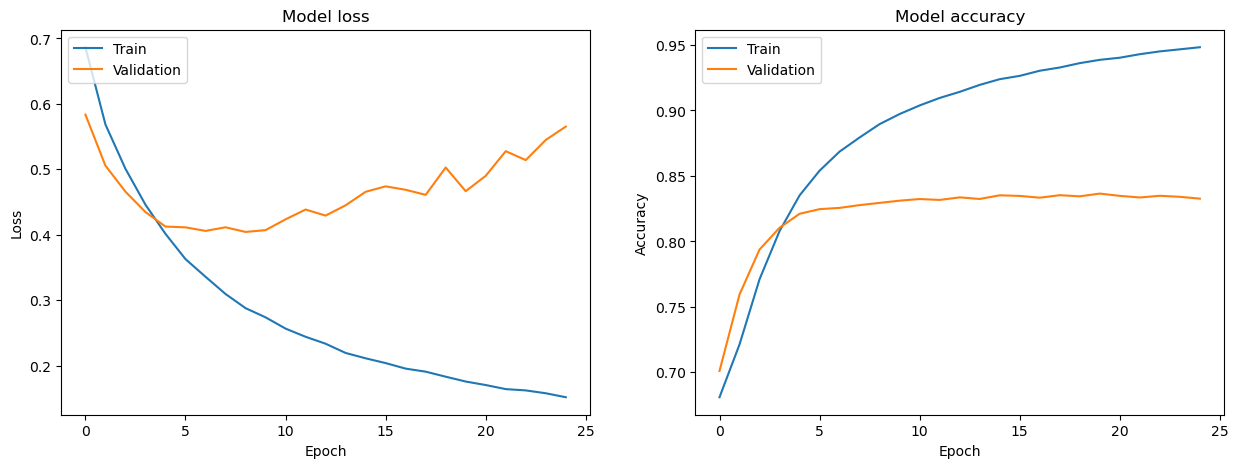

In [13]:
#Training of the model

#We set the hyper-parameters
BATCH_SIZE = 128
EPOCHS = 25

#We train the model
history = model.fit(features_train, labels_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(features_val, labels_val))

#We plot the training and validation accuracy and loss
plot_history(history)


#### **MODEL EVALUATION AND SAVING**

In [14]:
# Model evaluation

# We set the hyper-parameters
BATCH_SIZE_EVAL = 128
EPOCHS_EVAL = 9

# We train again the model with the whole training set
train_val_features = np.concatenate((features_train, features_val), axis=0)
train_val_labels = np.concatenate((labels_train, labels_val), axis=0)

model = build_complex_model()
model.fit(train_val_features, train_val_labels, batch_size=BATCH_SIZE_EVAL, epochs=EPOCHS_EVAL)

# We evaluate the model on the test set
loss, accuracy = model.evaluate(features_test, labels_test)
print('Test loss: ', loss)
print('Test accuracy: ', accuracy)

# We save the model
model.save('complex_model.h5')

Epoch 1/9
1603/1603 [==============================] - 9s 6ms/step - loss: 0.6759 - accuracy: 0.6905
Epoch 2/9
1603/1603 [==============================] - 12s 8ms/step - loss: 0.5382 - accuracy: 0.7524
Epoch 3/9
1603/1603 [==============================] - 10s 6ms/step - loss: 0.4701 - accuracy: 0.7926
Epoch 4/9
1603/1603 [==============================] - 11s 7ms/step - loss: 0.4217 - accuracy: 0.8218
Epoch 5/9
1603/1603 [==============================] - 12s 7ms/step - loss: 0.3827 - accuracy: 0.8428
Epoch 6/9
1603/1603 [==============================] - 12s 8ms/step - loss: 0.3545 - accuracy: 0.8568
Epoch 7/9
1603/1603 [==============================] - 9s 5ms/step - loss: 0.3314 - accuracy: 0.8697
Epoch 8/9
1603/1603 [==============================] - 11s 7ms/step - loss: 0.3109 - accuracy: 0.8802
Epoch 9/9
1603/1603 [==============================] - 5s 3ms/step - loss: 0.3888 - accuracy: 0.8387
Test loss:  0.38879337906837463
Test accuracy:  0.8387178778648376


## 6. **FOURTH MODEL: Transformer**

#### **BUILDING THE MODEL**

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 2000)]       0           []                               
                                                                                                  
 dense_36 (Dense)               (None, 64)           128064      ['input_4[0][0]']                
                                                                                                  
 reshape_2 (Reshape)            (None, 1, 64)        0           ['dense_36[0][0]']               
                                                                                                  
 multi_head_attention_4 (MultiH  (None, 1, 64)       66368       ['reshape_2[0][0]',              
 eadAttention)                                                    'reshape_2[0][0]']        

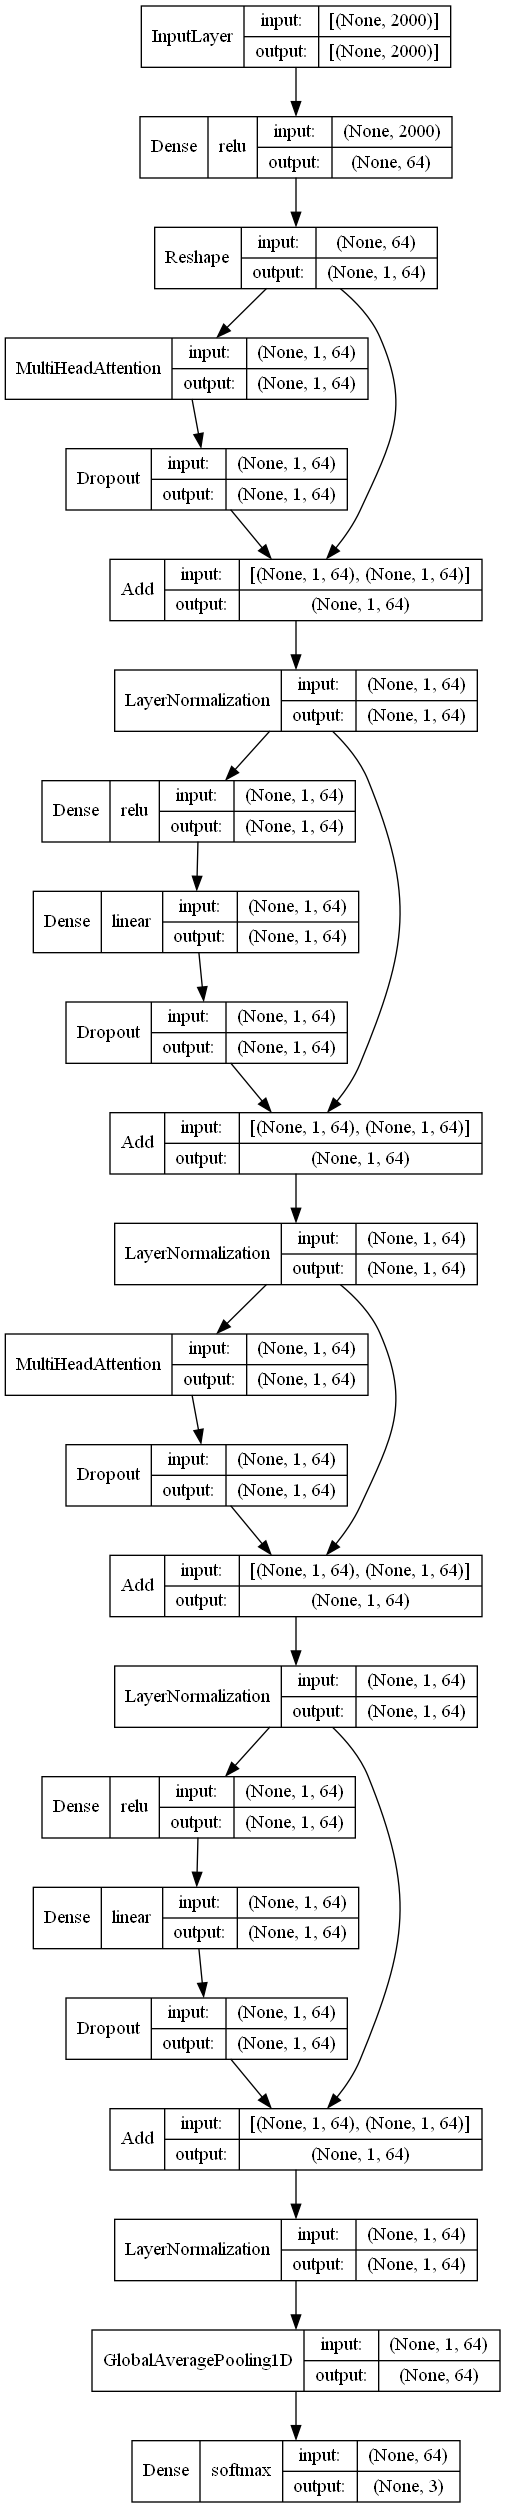

In [31]:
def transformer_block(inputs, num_heads, dim, dropout_rate):
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=dim)(inputs, inputs)
    attn_output = Dropout(dropout_rate)(attn_output)
    out1 = LayerNormalization(epsilon=1e-6)(Add()([inputs, attn_output]))

    ffn_output = Dense(dim, activation="relu")(out1)
    ffn_output = Dense(dim)(ffn_output)
    ffn_output = Dropout(dropout_rate)(ffn_output)
    return LayerNormalization(epsilon=1e-6)(Add()([out1, ffn_output]))

def build_transformer_model(vocab_size, num_heads, dim, num_layers, dropout_rate):
    inputs = Input(shape=(2 * vocab_size,))
    x = Dense(dim, activation="relu")(inputs)
    x = Reshape((1, dim))(x)  # Add a temporal dimension
    
    for _ in range(num_layers):
        x = transformer_block(x, num_heads, dim, dropout_rate)

    x = GlobalAveragePooling1D()(x)
    outputs = Dense(3, activation="softmax")(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

num_heads = 4
dim = 64
num_layers = 2
dropout_rate = 0.1

transformer_model = build_transformer_model(VOCABULARY_SIZE, num_heads, dim, num_layers, dropout_rate)

transformer_model.summary()

plot_model(transformer_model, to_file='transformer_model_plot.png', show_layer_names=False, show_shapes=True, show_layer_activations=True)

#### **TRAINING THE MODEL**

Epoch 1/8
1203/1203 [==============================] - 33s 27ms/step - loss: 0.0766 - accuracy: 0.9732 - val_loss: 0.8025 - val_accuracy: 0.8070
Epoch 2/8
1203/1203 [==============================] - 28s 23ms/step - loss: 0.0686 - accuracy: 0.9766 - val_loss: 0.8569 - val_accuracy: 0.8007
Epoch 3/8
1203/1203 [==============================] - 24s 20ms/step - loss: 0.0623 - accuracy: 0.9783 - val_loss: 0.8773 - val_accuracy: 0.8003
Epoch 4/8
1203/1203 [==============================] - 27s 23ms/step - loss: 0.0582 - accuracy: 0.9800 - val_loss: 0.8655 - val_accuracy: 0.8025
Epoch 5/8
1203/1203 [==============================] - 27s 23ms/step - loss: 0.0534 - accuracy: 0.9822 - val_loss: 0.9377 - val_accuracy: 0.7944
Epoch 6/8
1203/1203 [==============================] - 28s 24ms/step - loss: 0.0517 - accuracy: 0.9828 - val_loss: 0.9488 - val_accuracy: 0.7973
Epoch 7/8
1203/1203 [==============================] - 28s 24ms/step - loss: 0.0487 - accuracy: 0.9836 - val_loss: 0.9821 - val_ac

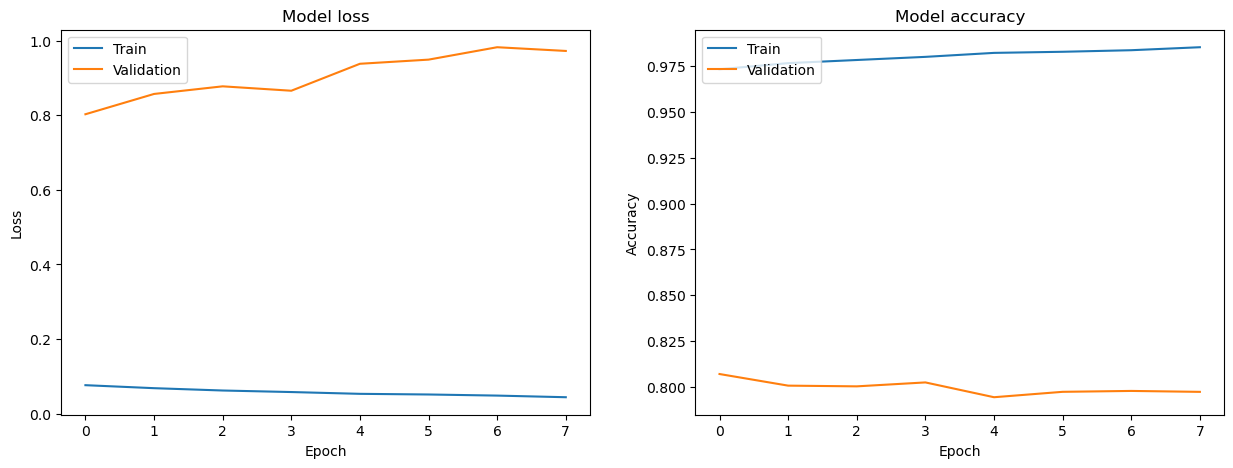

In [24]:
#Training of the model

#We set the hyper-parameters
BATCH_SIZE = 128
EPOCHS = 8

#We train the model
history = transformer_model.fit(features_train, labels_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(features_val, labels_val))

#We plot the training and validation accuracy and loss
plot_history(history)

#### **MODEL EVALUATION AND SAVING**

In [26]:
# Model evaluation

# We set the hyper-parameters
BATCH_SIZE_EVAL = 128
EPOCHS_EVAL = 1

# We train again the model with the whole training set
train_val_features = np.concatenate((features_train, features_val), axis=0)
train_val_labels = np.concatenate((labels_train, labels_val), axis=0)

transformer_model = build_transformer_model(VOCABULARY_SIZE, num_heads, dim, num_layers, dropout_rate)
transformer_model.fit(train_val_features, train_val_labels, batch_size=BATCH_SIZE_EVAL, epochs=EPOCHS_EVAL)

# We evaluate the model on the test set
loss, accuracy = transformer_model.evaluate(features_test, labels_test)
print('Test loss: ', loss)
print('Test accuracy: ', accuracy)

# We save the model
transformer_model.save('transformer_model.h5')

1603/1603 [==============================] - 15s 9ms/step - loss: 0.4615 - accuracy: 0.7915
Test loss:  0.461515337228775
Test accuracy:  0.791475772857666


## 7. **ENSEMBLE CLASSIFIER**

#### **SUMMARY OF PREVIOUS MODELS**

In [38]:
# We load the models
simple_model = load_model('simple_model.h5')
rnn_model = load_model('rnn_model.h5')
complex_model = load_model('complex_model.h5')
transformer_model = load_model('transformer_model.h5')

# We define the function to predict the labels
def predict_labels(model, data):
    # We predict the labels
    predictions = model.predict(data)
    # We get the labels
    labels = np.argmax(predictions, axis=1)
    return labels

# We define the function to evaluate the model
def evaluate_model(model, data, labels):
    # We predict the labels
    predictions = predict_labels(model, data)
    # We compute the accuracy
    loss, accuracy = model.evaluate(data, labels)
    # We print the results
    print('Accuracy: ', accuracy)
    print('Confusion matrix: ')
    print(confusion_matrix(np.argmax(labels, axis=1), predictions))
    print('Classification report: ')
    print(classification_report(np.argmax(labels, axis=1), predictions))

# We evaluate the simple model
print('Simple model')
evaluate_model(simple_model, features_test, labels_test)

# We evaluate the RNN model
print('RNN model')
evaluate_model(rnn_model, features_test, labels_test)

# We evaluate the complex model
print('Complex model')
evaluate_model(complex_model, features_test, labels_test)

# We evaluate the transformer model
print('Transformer model')
evaluate_model(transformer_model, features_test, labels_test)


Simple model
1603/1603 [==============================] - 11s 7ms/step - loss: 0.4372 - accuracy: 0.8078
Accuracy:  0.8077950477600098
Confusion matrix: 
[[31332  3672    66]
 [ 4991  9824     4]
 [ 1074    51   275]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     35070
           1       0.73      0.66      0.69     14819
           2       0.80      0.20      0.32      1400

    accuracy                           0.81     51289
   macro avg       0.79      0.58      0.62     51289
weighted avg       0.80      0.81      0.80     51289

RNN model
1603/1603 [==============================] - 126s 78ms/step - loss: 0.6621 - accuracy: 0.7110
Accuracy:  0.7109516859054565
Confusion matrix: 
[[33574  1496     0]
 [11929  2890     0]
 [ 1321    79     0]]
Classification report: 
              precision    recall  f1-score   support

           0       0.72      0.96      0.82     35070
           1       0.65    

c:\Users\Ameer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ameer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ameer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1603/1603 [==============================] - 7s 4ms/step - loss: 0.3888 - accuracy: 0.8387
Accuracy:  0.8387178778648376
Confusion matrix: 
[[32283  2748    39]
 [ 4379 10437     3]
 [ 1085    18   297]]
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     35070
           1       0.79      0.70      0.74     14819
           2       0.88      0.21      0.34      1400

    accuracy                           0.84     51289
   macro avg       0.84      0.61      0.66     51289
weighted avg       0.84      0.84      0.83     51289

Transformer model
1603/1603 [==============================] - 16s 10ms/step - loss: 0.4615 - accuracy: 0.7915
Accuracy:  0.791475772857666
Confusion matrix: 
[[32219  2807    44]
 [ 6663  8151     5]
 [ 1139    37   224]]
Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.92      0.86     35070
           1       0.74      0.55  

#### **ENSEMBLE CLASSIFIER**

In [13]:
import numpy as np
predictions = [2, 2, 0]
#count the number 2 in predictions
print(np.count_nonzero(predictions))

2


In [39]:
# We define the function to predict the labels
def predict_labels_ensemble(models, data):
    # We predict the labels
    predictions = np.zeros((data.shape[0], 3))
    for model in models:
        predictions += model.predict(data)
    # We get the labels
    labels = np.argmax(predictions, axis=1)
    return labels

# We define the function to evaluate the model
def evaluate_model_ensemble(models, data, labels):
    # We predict the labels
    predictions = predict_labels_ensemble(models, data)
    # We compute the accuracy
    accuracy = accuracy_score(np.argmax(labels, axis=1), predictions)
    # We print the results
    print('Accuracy: ', accuracy)
    print('Confusion matrix: ')
    print(confusion_matrix(np.argmax(labels, axis=1), predictions))
    print('Classification report: ')
    print(classification_report(np.argmax(labels, axis=1), predictions))

# We evaluate the ensemble model
print('Ensemble model')
evaluate_model_ensemble([simple_model, rnn_model, complex_model, transformer_model], features_test, labels_test)


Ensemble model
1603/1603 [==============================] - 14s 9ms/step
Accuracy:  0.8279163173390006
Confusion matrix: 
[[33468  1592    10]
 [ 6013  8805     1]
 [ 1197    13   190]]
Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     35070
           1       0.85      0.59      0.70     14819
           2       0.95      0.14      0.24      1400

    accuracy                           0.83     51289
   macro avg       0.87      0.56      0.61     51289
weighted avg       0.83      0.83      0.81     51289



## 8. **PREDICTION ON TEST.CSV**

#### **DATA IMPORTATION**

In [7]:
############################################
# GLOBAL VARIABLES
# We store the path of the dataset
DATA_SET_TEST_DIR = '../data/test.csv'
############################################

In [11]:
#Importation of the dataset : train.csv

# The dataset is a csv file with 5 columns, and we will use only the last 2 columns and the first one to get the associated id.
# The last 2 columns are text features where the first one is the fake news title 1 in English and the second one the news title 2 in English.
# We want to predict the label of each element by indicatating the relation between the news pair:  agreed/disagreed/unrelated.


#Function to load the dataset 
def load_data():
    # We load the dataset
    dataset = pd.read_csv(DATA_SET_TEST_DIR)
    # We get the features
    features = dataset.iloc[:, 3:5].values
    # We get the id
    id = dataset.iloc[:, 0].values
    return id, features

# We load the dataset
id, features = load_data()

#### **PRE-PROCESSING THE DATASET**

In [18]:
#Preprocessing of the dataset

# We will use keras to preprocess the dataset
# We will tokenize the features using the function Tokenizer from keras
# We will use the function to_categorical from keras to convert the labels to categorical data

############################################
# GLOBAL VARIABLES
# We store the path of the dataset
VOCABULARY_SIZE = 1000
############################################

# We initialize the tokenizer

tokenizer_1 = Tokenizer(num_words=VOCABULARY_SIZE)
tokenizer_2 = Tokenizer(num_words=VOCABULARY_SIZE)
# Now we process each feature separately
# We tokenize the first feature
tokenizer_1.fit_on_texts(features[:, 0])
docs_1 = tokenizer_1.texts_to_matrix(features[:, 0], mode='tfidf')
# We tokenize the second feature
tokenizer_2.fit_on_texts(features[:, 1])
docs_2 = tokenizer_2.texts_to_matrix(features[:, 1], mode='tfidf')

# We concatenate the features
features = np.concatenate((docs_1, docs_2), axis=1)

# We print the shape of the features
print(features.shape)


(100, 2000)


#### **PREDICTION**

In [20]:
LABELS_MAP = {0: 'unrelated', 1: 'agreed', 2: 'disagreed'}

# We load the models
simple_model = load_model('simple_model.h5')
rnn_model = load_model('rnn_model.h5')
complex_model = load_model('complex_model.h5')
transformer_model = load_model('transformer_model.h5')

# We define the function to predict the labels
def predict_labels_ensemble(models, data):
    # We predict the labels
    predictions = np.zeros((data.shape[0], 3))
    for model in models:
        predictions += model.predict(data)
    # We get the labels
    labels = np.argmax(predictions, axis=1)
    # We map the labels to the original labels
    labels = [LABELS_MAP[label] for label in labels]
    return labels

# We predict the labels
predictions = predict_labels_ensemble([simple_model, rnn_model, complex_model, transformer_model], features)


4/4 [==============================] - 0s 4ms/step


#### **EXPORTING THE PREDICTIONS**

In [22]:
# We create the submission file
submission = pd.DataFrame({'id': id, 'label': predictions})
submission.to_csv('../data/submission.csv', index=False)